# Required Imports

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPool1D, Flatten, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading the data from the dataset

In [ ]:
df =  pd.read_csv("power-speed data.csv").dropna(axis=1)
df

,S.No,Speed(mm/s),Power(kW),Ti Max. Temp(K),Aluminium Max Temp
0,1,1000,1200,952.0,750.9
1,2,1010,1200,942.0,738.0
2,3,1020,1200,928.0,727.0
3,4,1030,1200,906.0,708.0
4,5,1000,1400,1030.0,835.0
...,...,...,...,...,...
95,96,1340,2650,1280.1,1082.6
96,97,1350,2650,1266.3,1068.3
97,98,1340,2700,1303.0,1101.9
98,99,1350,2700,1285.8,1083.8


In [ ]:
df.describe()

,S.No,Speed(mm/s),Power(kW),Ti Max. Temp(K),Aluminium Max Temp
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,1176.000000,1972.000000,1129.133000,928.468000
std,29.011492,129.762798,527.999847,144.692169,145.015911
min,1.000000,1000.000000,1200.000000,838.000000,637.000000
25%,25.750000,1030.000000,1450.000000,984.475000,782.825000
50%,50.500000,1205.000000,2000.000000,1168.700000,967.700000
75%,75.250000,1300.000000,2450.000000,1243.500000,1043.375000
max,100.000000,1360.000000,2850.000000,1378.000000,1178.000000


In [ ]:
X = df.iloc[:, 1:-2]
y = df.iloc[:, -2:]
X.head()

,Speed(mm/s),Power(kW)
0,1000,1200
1,1010,1200
2,1020,1200
3,1030,1200
4,1000,1400


# Normalizing the values

In [ ]:
scaler_input = MinMaxScaler(feature_range=(0, 1))
scaler_output = MinMaxScaler(feature_range=(0, 1))
scaled_input = scaler_input.fit_transform(X)
scaled_output = scaler_output.fit_transform(y)

# print(scaled_input)
# print(scaled_output)

train_x, test_x, train_y, test_y = train_test_split(scaled_input, scaled_output, test_size=0.40, shuffle= True)

# Defining the CNN architecture

In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='relu'))

model.compile(loss='mean_squared_error', optimizer='adam')


# Model prediction

In [ ]:
history = model.fit(train_x, train_y, epochs=500, batch_size=32, validation_data=(test_x, test_y), verbose=0)
train_pred = model.predict(train_x)
test_pred = model.predict(test_x)

2/2 [==============================] - 0s 6ms/step


In [ ]:
train_data = pd.DataFrame({
    "Speed": train_x[:, 0],
    "Power": train_x[:, 1],
    "Actual Temperature (Ti)": train_y[:, 0],
    "Predicted Temperature (Ti)": train_pred[:, 0],
    "Actual Temperature (Al)": train_y[:, 1],
    "Predicted Temperature (Al)": train_pred[:, 1]
})

train_data

,Speed,Power,Actual Temperature (Ti),Predicted Temperature (Ti),Actual Temperature (Al),Predicted Temperature (Al)
0,0.916667,0.818182,0.744444,0.742030,0.737523,0.737825
1,0.444444,0.393939,0.475741,0.465116,0.474307,0.465433
2,0.000000,0.454545,0.940741,0.922962,0.940850,0.928574
3,0.833333,0.818182,0.825370,0.825218,0.823845,0.823289
4,0.000000,0.000000,0.211111,0.212459,0.210536,0.212854
5,0.194444,0.121212,0.220926,0.211425,0.218669,0.206209
6,0.388889,0.333333,0.398148,0.408471,0.397412,0.405517
7,0.944444,0.909091,0.861111,0.872203,0.859335,0.868458
8,0.000000,0.424242,0.880370,0.873612,0.880591,0.878144
9,0.722222,0.515152,0.412963,0.413935,0.410351,0.409265


In [ ]:
test_data = pd.DataFrame({
    "Speed": test_x[:, 0],
    "Power": test_x[:, 1],
    "Actual Temperature (Ti)": test_y[:, 0],
    "Predicted Temperature (Ti)": test_pred[:, 0],
    "Actual Temperature (Al)": test_y[:, 1],
    "Predicted Temperature (Al)": test_pred[:, 1]
})

test_data

,Speed,Power,Actual Temperature (Ti),Predicted Temperature (Ti),Actual Temperature (Al),Predicted Temperature (Al)
0,0.000000,0.121212,0.355556,0.398380,0.365989,0.391927
1,0.722222,0.696970,0.732037,0.726348,0.728466,0.727061
2,0.000000,0.212121,0.485185,0.531782,0.484288,0.527334
3,0.000000,0.393939,0.824074,0.824262,0.826248,0.827714
4,0.138889,0.060606,0.164815,0.166449,0.165619,0.164912
5,0.805556,0.787879,0.800185,0.800501,0.796858,0.799232
6,0.750000,0.727273,0.755926,0.751065,0.756377,0.751118
7,0.694444,0.666667,0.704815,0.701630,0.699815,0.703004
8,0.972222,0.909091,0.829259,0.844279,0.825878,0.839455
9,0.638889,0.484848,0.447778,0.441754,0.450277,0.439447


In [ ]:
train_pred_inv = scaler_output.inverse_transform(train_pred)
test_pred_inv = scaler_output.inverse_transform(test_pred)
train_y_inv = scaler_output.inverse_transform(train_y)
test_y_inv = scaler_output.inverse_transform(test_y)
train_x_inv = scaler_input.inverse_transform(train_x)
test_x_inv = scaler_input.inverse_transform(test_x)

In [ ]:
train_data_inv = pd.DataFrame({
    "Speed": train_x_inv[:, 0],
    "Power": train_x_inv[:, 1],
    "Actual Temperature (Ti)": train_y_inv[:, 0],
    "Predicted Temperature (Ti)": train_pred_inv[:, 0],
    "Actual Temperature (Al)": train_y_inv[:, 1],
    "Predicted Temperature (Al)": train_pred_inv[:, 1]
})

train_data_inv


,Speed,Power,Actual Temperature (Ti),Predicted Temperature (Ti),Actual Temperature (Al),Predicted Temperature (Al)
0,1330.0,2550.0,1240.0,1238.695923,1036.0,1036.163574
1,1160.0,1850.0,1094.9,1089.162476,893.6,888.799377
2,1000.0,1950.0,1346.0,1336.399414,1146.0,1139.358643
3,1300.0,2550.0,1283.7,1283.617798,1082.7,1082.399170
4,1000.0,1200.0,952.0,952.727661,750.9,752.154053
5,1070.0,1400.0,957.3,952.169373,755.3,748.559326
6,1140.0,1750.0,1053.0,1058.574463,852.0,856.384827
7,1340.0,2700.0,1303.0,1308.989380,1101.9,1106.835693
8,1000.0,1900.0,1313.4,1309.750488,1113.4,1112.075928
9,1260.0,2050.0,1061.0,1061.524780,859.0,858.412415


In [ ]:
test_data_inv = pd.DataFrame({
    "Speed": test_x_inv[:, 0],
    "Power": test_x_inv[:, 1],
    "Actual Temperature (Ti)": test_y_inv[:, 0],
    "Predicted Temperature (Ti)": test_pred_inv[:, 0],
    "Actual Temperature (Al)": test_y_inv[:, 1],
    "Predicted Temperature (Al)": test_pred_inv[:, 1]
})

test_data_inv

,Speed,Power,Actual Temperature (Ti),Predicted Temperature (Ti),Actual Temperature (Al),Predicted Temperature (Al)
0,1000.0,1400.0,1030.0,1053.125244,835.0,849.032471
1,1260.0,2350.0,1233.3,1230.227783,1031.1,1030.339844
2,1000.0,1550.0,1100.0,1125.162109,899.0,922.287537
3,1000.0,1850.0,1283.0,1283.101685,1084.0,1084.793213
4,1050.0,1300.0,927.0,927.882690,726.6,726.217407
5,1290.0,2500.0,1270.1,1270.270264,1068.1,1069.384399
6,1270.0,2400.0,1246.2,1243.575317,1046.2,1043.354736
7,1250.0,2300.0,1218.6,1216.880371,1015.6,1017.325012
8,1350.0,2700.0,1285.8,1293.910400,1083.8,1091.145142
9,1230.0,2000.0,1079.8,1076.546997,880.6,874.740601


#Train Data prediction

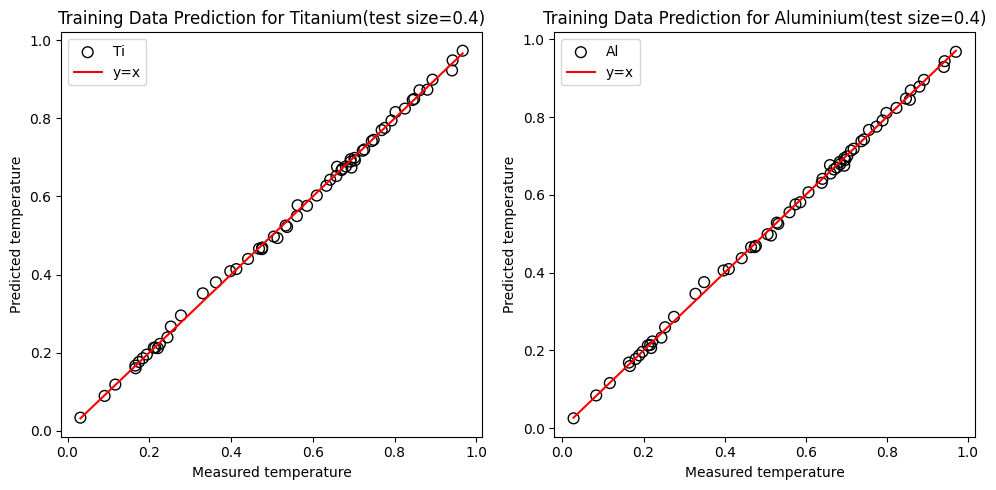

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(train_y[:, 0], train_pred[:, 0], facecolor='none', edgecolor='black', s=60, label='Ti')
plt.plot([np.min(train_y[:, 0]), np.max(train_y[:, 0])], [np.min(train_y[:, 0]), np.max(train_y[:, 0])], 'r-', label='y=x')
plt.xlabel('Measured temperature')
plt.ylabel('Predicted temperature')
plt.title('Training Data Prediction for Titanium(test size=0.4)')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(train_y[:, 1], train_pred[:, 1], facecolor='none', edgecolor='black', s=60, label='Al')
plt.plot([np.min(train_y[:, 1]), np.max(train_y[:, 1])], [np.min(train_y[:, 1]), np.max(train_y[:, 1])], 'r-', label='y=x')
plt.xlabel('Measured temperature')
plt.ylabel('Predicted temperature')
plt.title('Training Data Prediction for Aluminium(test size=0.4)')
plt.legend()

plt.tight_layout()
plt.show()


# Test Data Prediction

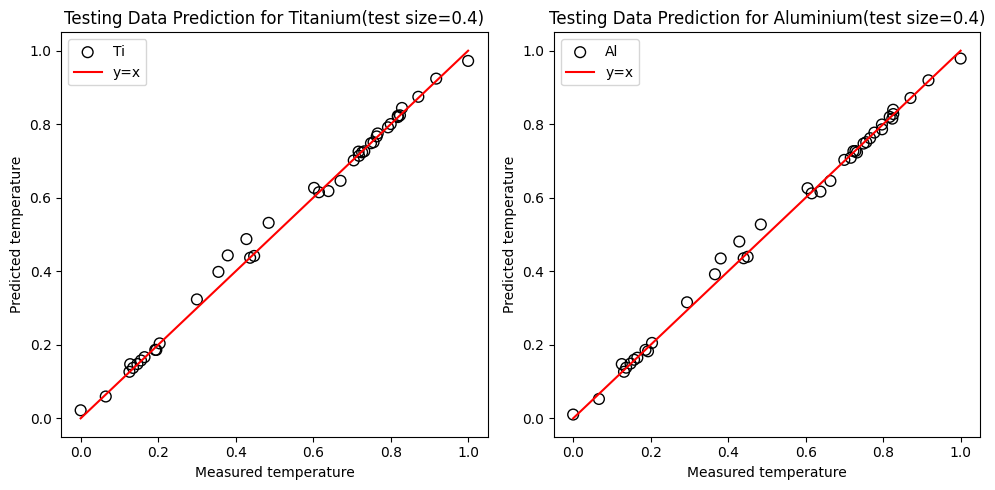

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(test_y[:, 0], test_pred[:, 0], facecolor='none', edgecolor='black', s=60, label='Ti')
plt.plot([np.min(test_y[:, 0]), np.max(test_y[:, 0])], [np.min(test_y[:, 0]), np.max(test_y[:, 0])], 'r-', label='y=x')
plt.xlabel('Measured temperature')
plt.ylabel('Predicted temperature')
plt.title('Testing Data Prediction for Titanium(test size=0.4)')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(test_y[:, 1], test_pred[:, 1], facecolor='none', edgecolor='black', s=60, label='Al')
plt.plot([np.min(test_y[:, 1]), np.max(test_y[:, 1])], [np.min(test_y[:, 1]), np.max(test_y[:, 1])], 'r-', label='y=x')
plt.xlabel('Measured temperature')
plt.ylabel('Predicted temperature')
plt.title('Testing Data Prediction for Aluminium(test size=0.4)')
plt.legend()

plt.tight_layout()
plt.show()


# Training vs Testing Loss

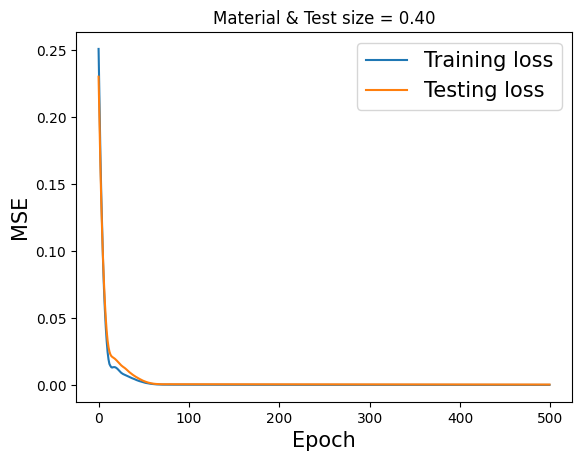

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Testing loss')
plt.xlabel('Epoch', fontsize=15)
plt.ylabel('MSE', fontsize=15)
plt.title('Material & Test size = 0.40')
plt.legend(fontsize=15)
plt.savefig('Training vs Testing loss.jpg')
plt.show()

# R-Squared Error

In [ ]:
r2_error_train1 = r2_score(train_y_inv, train_pred_inv)
r2_error_test1 = r2_score(test_y_inv, test_pred_inv)
print('Train R-squared: %.3f, Test R-squared: %.3f' % (r2_error_train1, r2_error_test1))


Train R-squared: 0.999, Test R-squared: 0.996


# Output prediction


In [ ]:
Speed = float(input("Enter the Speed in mm/s: "))
Power = float(input("Enter the power in kW: "))
data_input = [[Speed, Power]]
temperature = model.predict(data_input)

print("Temperature for Ti:", temperature[0][0])
print("Temperature for Al:", temperature[0][1])
